<a href="https://colab.research.google.com/github/Ashwin2708/data-structures/blob/master/Stock_Market_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This program is going to use an artificial RNN which is LSTM.
#Also we are predicting the stock prices of Apple Inc. from the past 60 days to today

In [ ]:
#First we import the libraries to support our program
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
!pip install --upgrade pandas-datareader

In [34]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557465
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624948
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765108
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898558
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878099
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.519104
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.688599
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.595108


In [37]:
#Get the number of rows and colums in the data set
df.shape

(2003, 6)

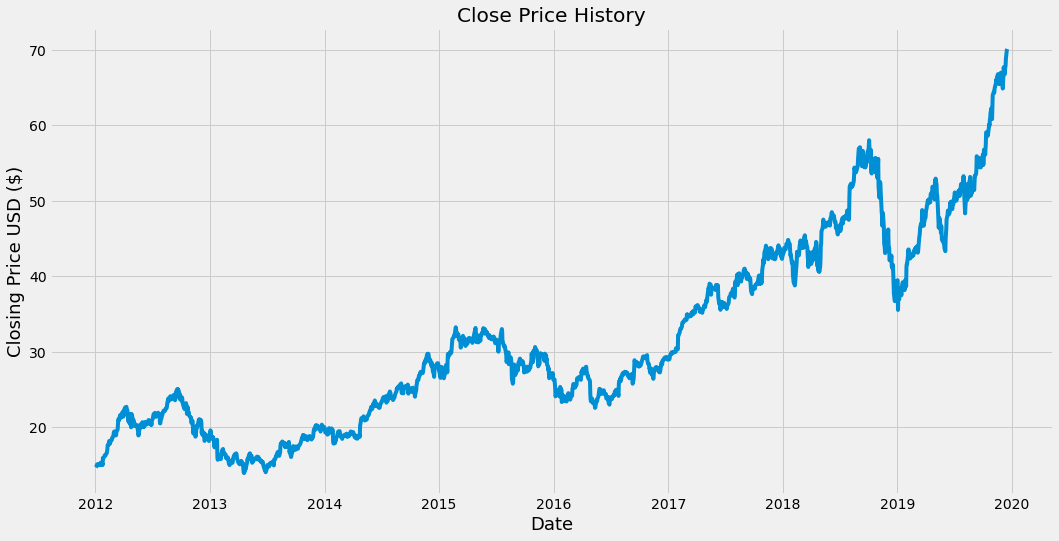

In [38]:
#Visualize the closing price hsitory
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.show()

In [39]:
#Create a new dataframe with only the 'Close Column'
data = df.filter(['Close'])
#Conver the dataframe to a numpy array
dataset = data.values
#Get the  number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

1603

In [40]:
#It is always important to SCALE THE DATA
#Scaling the data makes it easier to present in RNN
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [41]:
#Create the training dataset
#Create the scaled training data
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train & y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [42]:
#Let's convert the x_train & Y-train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1543, 60)

In [43]:
#Reshape the data
#A LSTM network expects the data to be 3 dimensional, i.e., 
#1: number of samples
#2: number of time steps
#3: number of features

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [44]:
#Build an LSTM Model that contains Layers
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [45]:
#Compile the Model
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [46]:
#Train the current model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 51s 30ms/step - loss: 6.8972e-04


In [47]:
#Create the testig dataset
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create X and Y test data set
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [48]:
#Conver the Data into a numpy array
x_test = np.array(x_test)

In [49]:
#Again reshape the data set for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [50]:
#Get the predicted price value for x test dataset
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [51]:
#Get the RMSE for accuracy and efficiency
#also the low value of RSME gives the good fit yeilds
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.1853723430633545

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


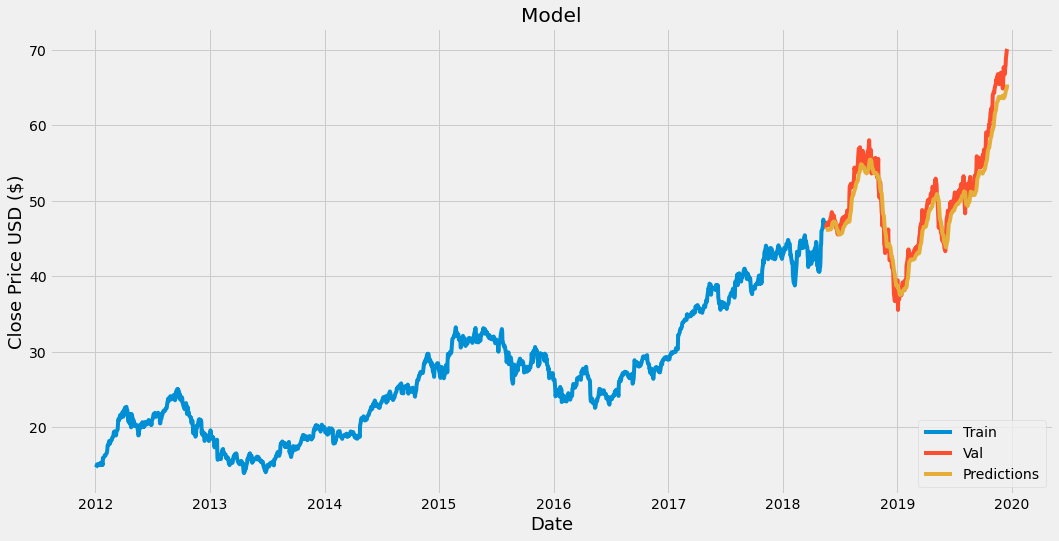

In [52]:
from IPython.core.pylabtools import figsize
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualization
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
valid

In [54]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end="2019-12-17")

#Create a new data frame
new_df = apple_quote.filter(['Close'])

#Get the last 60 days data and convert them into array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1 
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append the past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set into numpy array
X_test = np.array(X_test)

#Reshape for LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling
pred_price= scaler.inverse_transform(pred_price)
print(pred_price)

[[65.87821]]


In [55]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end="2019-12-18")
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
